IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

READ DATA

In [2]:
url='https://drive.google.com/file/d/1GuosYDgfE-SrmfBao53O-iaVUYov0THG/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head(10)

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
0,9120.0,0.802982,2.0,0.766127,13,6,2,0,0,1
1,2600.0,0.121876,1.0,0.957151,4,0,0,0,0,0
2,3042.0,0.085113,0.0,0.658180,2,0,1,0,1,0
3,3300.0,0.036050,0.0,0.233810,5,0,0,0,0,0
4,63588.0,0.024926,0.0,0.907239,7,1,1,0,0,0
5,3500.0,0.375607,1.0,0.213179,3,1,0,0,0,0
6,NaN,5710.000000,0.0,0.305682,8,3,0,0,0,0
7,3500.0,0.209940,0.0,0.754464,8,0,0,0,0,0
8,NaN,46.000000,NaN,0.116951,2,0,0,0,0,0
9,23684.0,0.606291,2.0,0.189169,9,4,0,0,0,0


In [3]:
df.shape

(150000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   monthly_income                    120269 non-null  float64
 1   debt_ratio                        150000 non-null  float64
 2   nr_dependents                     146076 non-null  float64
 3   credit_balances_dividedby_limits  150000 non-null  float64
 4   nr_open_credit_lines_and_loans    150000 non-null  int64  
 5   nr_real_estate_loans              150000 non-null  int64  
 6   nr_times_30_59_days_past_due      150000 non-null  int64  
 7   nr_times_60_89_days_past_due      150000 non-null  int64  
 8   nr_times_90plus_days_past_due     150000 non-null  int64  
 9   serious_delinquency               150000 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 11.4 MB


In [5]:
df["serious_delinquency"].value_counts()

serious_delinquency
0    139974
1     10026
Name: count, dtype: int64

In [6]:
df.isnull().sum().sum()

33655

HANDLING NULL VALUES

In [7]:
df1=df.copy()
df1["monthly_income"]=df1["monthly_income"].fillna(value=df["monthly_income"].mean())
df1["nr_dependents"]=df1["nr_dependents"].fillna(value=df["nr_dependents"].mean())
df1["nr_dependents"]=df1["nr_dependents"].astype("int")
df1.head(10)

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
0,9120.000000,0.802982,2,0.766127,13,6,2,0,0,1
1,2600.000000,0.121876,1,0.957151,4,0,0,0,0,0
2,3042.000000,0.085113,0,0.658180,2,0,1,0,1,0
3,3300.000000,0.036050,0,0.233810,5,0,0,0,0,0
4,63588.000000,0.024926,0,0.907239,7,1,1,0,0,0
5,3500.000000,0.375607,1,0.213179,3,1,0,0,0,0
6,6670.221237,5710.000000,0,0.305682,8,3,0,0,0,0
7,3500.000000,0.209940,0,0.754464,8,0,0,0,0,0
8,6670.221237,46.000000,0,0.116951,2,0,0,0,0,0
9,23684.000000,0.606291,2,0.189169,9,4,0,0,0,0


In [8]:
df2=df1.copy()

In [9]:
df2.isnull().sum().sum()

0

In [10]:
df2["serious_delinquency"].value_counts()

serious_delinquency
0    139974
1     10026
Name: count, dtype: int64

univarient analyis

C:\Users\cyamu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


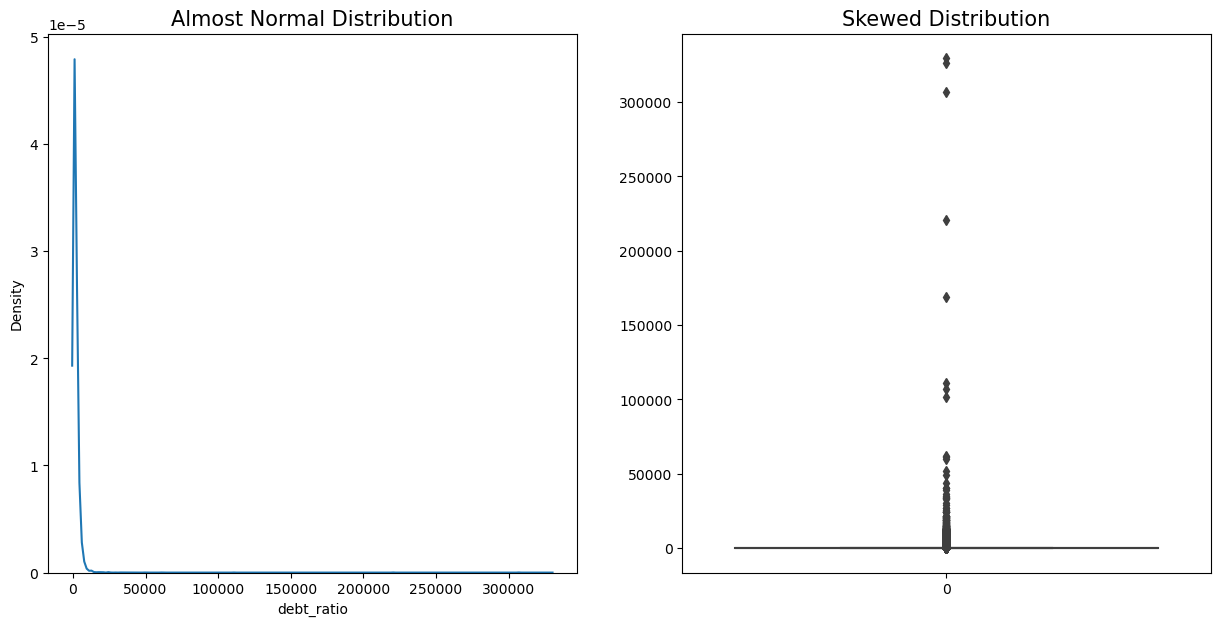

In [11]:

import seaborn as sns
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution", fontsize=15)
sns.kdeplot(data=df2["debt_ratio"])
plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = df2["debt_ratio"])
plt.show()

HANDLING OUTLIERS

In [12]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df2["debt_ratio"].quantile(0.25)
q2 = df2["debt_ratio"].quantile(0.75)
#finding out the value of Inter Quartile Range
IQR = q2 - q1

In [13]:
#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

In [14]:
#capping
#the outlier values were replaced by the max and min limit
df3= pd.DataFrame(np.where(df2["debt_ratio"] > max_limit, max_limit, (np.where(df2["debt_ratio"] < min_limit, min_limit, df2["debt_ratio"]))), columns=["debt_ratio"])
df3.head(10)

,debt_ratio
0,0.802982
1,0.121876
2,0.085113
3,0.036050
4,0.024926
5,0.375607
6,1.908024
7,0.209940
8,1.908024
9,0.606291


C:\Users\cyamu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


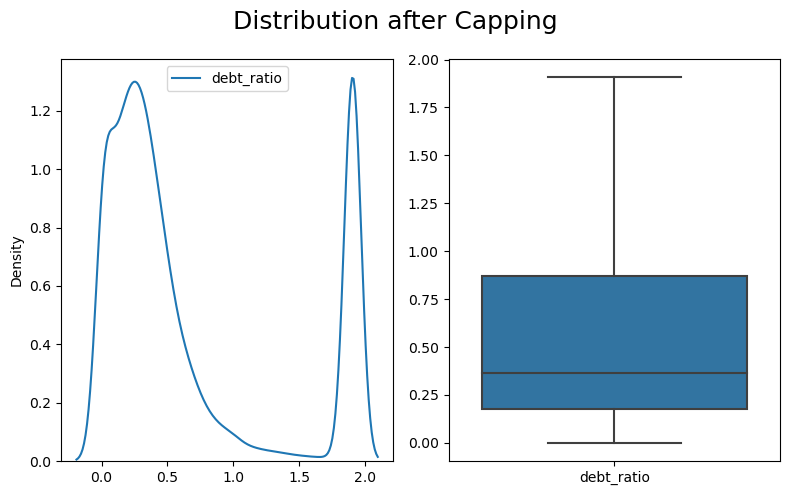

In [15]:
#distribution after capping
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df3)
plt.subplot(1,2,2)
sns.boxplot(data = df3)
plt.tight_layout()
plt.show()

In [16]:
#replace the column.
df4=df2.copy()
df4["debt_ratio"]=df3["debt_ratio"]
df4.head(10)


,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
0,9120.000000,0.802982,2,0.766127,13,6,2,0,0,1
1,2600.000000,0.121876,1,0.957151,4,0,0,0,0,0
2,3042.000000,0.085113,0,0.658180,2,0,1,0,1,0
3,3300.000000,0.036050,0,0.233810,5,0,0,0,0,0
4,63588.000000,0.024926,0,0.907239,7,1,1,0,0,0
5,3500.000000,0.375607,1,0.213179,3,1,0,0,0,0
6,6670.221237,1.908024,0,0.305682,8,3,0,0,0,0
7,3500.000000,0.209940,0,0.754464,8,0,0,0,0,0
8,6670.221237,1.908024,0,0.116951,2,0,0,0,0,0
9,23684.000000,0.606291,2,0.189169,9,4,0,0,0,0


SPLITTING THE INPUT AND TARGET VARIABLE

In [17]:
x=df4[["monthly_income","debt_ratio","nr_dependents","credit_balances_dividedby_limits","nr_open_credit_lines_and_loans","nr_real_estate_loans","nr_times_30_59_days_past_due","nr_times_60_89_days_past_due","nr_times_90plus_days_past_due"]]
x.head()

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due
0,9120.0,0.802982,2,0.766127,13,6,2,0,0
1,2600.0,0.121876,1,0.957151,4,0,0,0,0
2,3042.0,0.085113,0,0.658180,2,0,1,0,1
3,3300.0,0.036050,0,0.233810,5,0,0,0,0
4,63588.0,0.024926,0,0.907239,7,1,1,0,0


In [18]:
y=df4[["serious_delinquency"]]
y.head()

,serious_delinquency
0,1
1,0
2,0
3,0
4,0


HANDLING IMBALANCE DATA

serious_delinquency
0                      139974
1                       10026
Name: count, dtype: int64

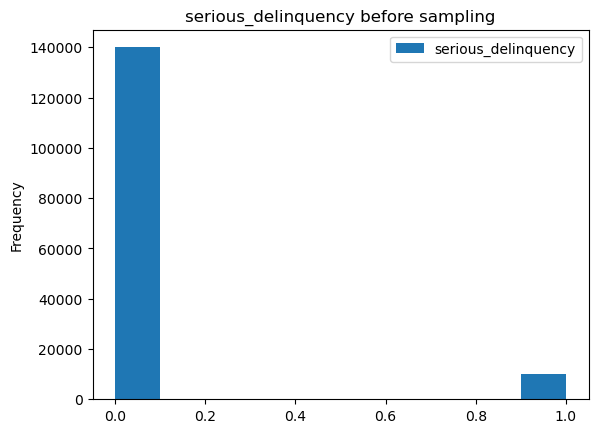

In [19]:
y.plot(kind='hist', title= 'serious_delinquency before sampling')
y.value_counts()

In [20]:
percentage = (df2["serious_delinquency"].value_counts(normalize=True).reset_index(name='percentage') )
print (percentage.map("{:.2%}".format))

  serious_delinquency percentage
0               0.00%     93.32%
1             100.00%      6.68%


In [21]:
#smote to balance the classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)
x_smote.value_counts()
y_smote.value_counts()

serious_delinquency
0                      139974
1                      139974
Name: count, dtype: int64

TRAINING AND TESTING

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=4)
print("Train set",x_train.shape,y_train.shape)
print("Test set",x_test.shape,y_test.shape)

Train set (223958, 9) (223958, 1)
Test set (55990, 9) (55990, 1)


In [23]:
# Check class distribution
y_train.value_counts()

serious_delinquency
1                      112082
0                      111876
Name: count, dtype: int64

MODELING

In [24]:
# Calculate the ratio of negative class to positive class
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]
ratio

0.9981620599204154

In [25]:
import xgboost as xgb
# Create an XGBoost classifier with the scale_pos_weight and value
model = xgb.XGBClassifier(n_estimators=250,scale_pos_weight=ratio)
# Fit the model to the training data
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

EVALUATION

In [26]:
# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [27]:
# Make predictions on the train set
y_pred_train = model.predict(x_train)
y_pred_proba_train = model.predict_proba(x_train)[:, 1]

In [28]:
from sklearn.metrics import roc_auc_score, f1_score

In [29]:
# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.8967220262414202


In [30]:
#classification report for test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81     28098
           1       0.80      0.85      0.82     27892

    accuracy                           0.82     55990
   macro avg       0.82      0.82      0.82     55990
weighted avg       0.82      0.82      0.82     55990



In [31]:
#classification report for train set
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83    111876
           1       0.82      0.87      0.84    112082

    accuracy                           0.84    223958
   macro avg       0.84      0.84      0.84    223958
weighted avg       0.84      0.84      0.84    223958



CONFUSION MATRIX

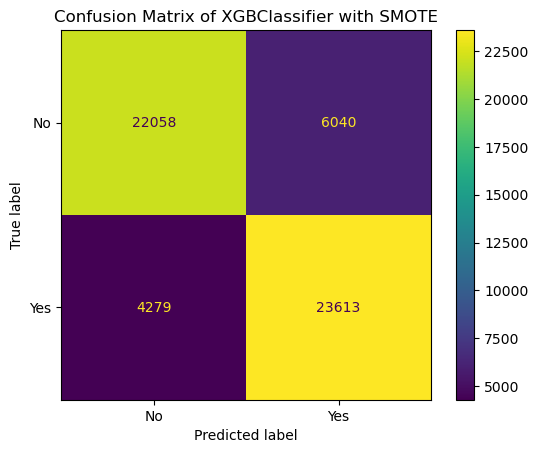

In [32]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["No","Yes"])
cm_display.plot()
plt.title("Confusion Matrix of XGBClassifier with SMOTE")
plt.show()